In [1]:
import numpy as np
import pandas as pd
import cv2
import seaborn as sns
import os
from PIL import Image

import matplotlib.pyplot as plt
import glob

from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, BatchNormalization, MaxPooling2D

from keras.applications import VGG16

from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from keras.utils import  to_categorical
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [2]:
train_image = []
train_label = []
test_image = []
test_label = []
train_pos = 'C:/Users/HP/OneDrive/Desktop/vgg16_data/positive_1'
train_neg = 'C:/Users/HP/OneDrive/Desktop/vgg16_data/negative_1'
test_pos = 'C:/Users/HP/OneDrive/Desktop/vgg16_data/positive_test'
test_neg = 'C:/Users/HP/OneDrive/Desktop/vgg16_data/negative_test'

In [3]:
for filename in os.listdir(train_pos):
    img_path = train_pos+'/'+filename
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    train_image.append(img)
    train_label.append(1)

for filename in os.listdir(train_neg):
    img_path = train_neg+'/'+filename
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    train_image.append(img)
    train_label.append(0)

for filename in os.listdir(test_pos):
    img_path = test_pos+'/'+filename
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    test_image.append(img)
    test_label.append(1)

for filename in os.listdir(test_neg):
    img_path = test_neg+'/'+filename
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    test_image.append(img)
    test_label.append(0)



train_image = np.array(train_image)
test_image = np.array(test_image)

In [7]:
print(train_image)
print(len(test_image))
print(len(train_label))
print(len(test_label))

[[[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  ...

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]]


 [[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  ...

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]]


 [[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0

In [4]:
train_image = train_image/255.0
test_image = test_image/255.0

In [5]:
VGG_model = VGG16(weights = 'imagenet', include_top = False, input_shape = (128, 128, 3))  

for layer in VGG_model.layers:
    layer.trainable = False

VGG_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [6]:
feature_extractor = VGG_model.predict(train_image)
features = feature_extractor.reshape(feature_extractor.shape[0], -1)

X_rf = features

10/10 [==============================] - 23s 2s/step


In [7]:
RF_model = RandomForestClassifier(n_estimators=100, random_state=42)

RF_model.fit(X_rf, train_label)

X_test_feature = VGG_model.predict(test_image)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

prediction_RF = RF_model.predict(X_test_features)

2/2 [==============================] - 3s 1s/step


Accuracy = 0.6041666666666666
Recall = 0.5925925925925926
Precision = 0.6666666666666666


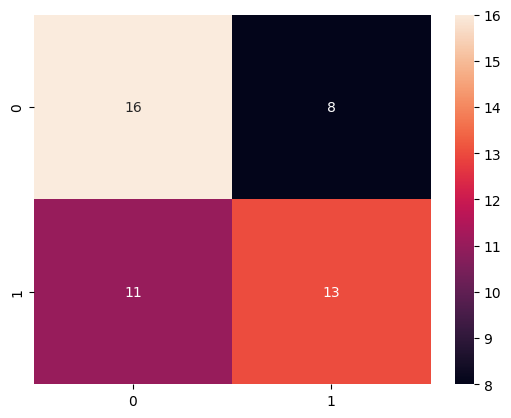

In [8]:
cm = confusion_matrix(test_label, prediction_RF)
sns.heatmap(cm, annot = True) 

tp, fp, fn, tn = cm.ravel()

recall = tp/(tp+fn)
precision = tp/(tp+fp)

print('Accuracy =', metrics.accuracy_score(test_label, prediction_RF))
print("Recall =", recall)
print("Precision =", precision)

AttributeError: 'RandomForestClassifier' object has no attribute 'RF_model'

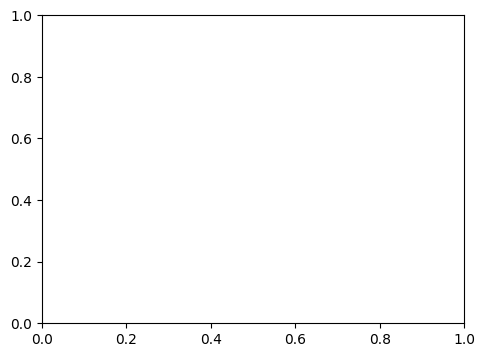

In [25]:
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(RF_model.RF_model['accuracy'], label='Training Accuracy')
plt.plot(RF_model.RF_model['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(RF_model.history['loss'], label='Training Loss')
plt.plot(RF_model.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()